# <font color='red'> Business Objective/Problem </font>
+ Tiki là một hệ sinh thái thương mại “all in one”, trong 
đó có tiki.vn, là một website thương mại điện tử đứng 
top 2 của Việt Nam, top 6 khu vực Đông Nam Á.
+ Trên trang này đã triển khai nhiều tiện ích hỗ trợ nâng 
cao trải nghiệm người dùng và họ muốn xây dựng 
nhiều tiện ích hơn nữa.
+ Giả sử công ty này chưa triển khai Recommender 
System và bạn được yêu cầu triển khai hệ thống này, 
bạn sẽ làm gì?

# <font color='blue'> Các kiến thức/ kỹ năng cần để giải quyết vấn đề này: </font>
+ Hiểu vấn đề
+ Import các thư viện cần thiết và hiểu cách sử dụng
+ Đọc dữ liệu (dữ liệu project này được cung cấp)
+ Thực hiện EDA cơ bản (sử dụng Pandas Profiling 
Report)
+ Tiền xử lý dữ liệu: làm sạch, tạo tính năng mới, lựa 
chọn tính năng cần thiết…
+ Trực quan hóa dữ liệu
+ Lựa chọn thuật toán cho bài toán 
recommendation system
+ Xây dựng model
+ Đánh giá model 
+ Báo cáo kết quả


# <font color='blue'> Triển khai dự án </font>
**Bước 1: Business Understanding**
+ Dựa vào yêu cầu nói trên => xác định vấn đề: 
> + Chưa có hệ thống Recommendation System 
> + => Mục tiêu/ vấn đề: Xây dựng Recommendation System 
cho một hoặc một số nhóm hàng hóa trên tiki.vn giúp đề 
xuất và gợi ý cho người dùng/ khách hàng. => Xây dựng 
các mô hình đề xuất:
> > + Content-based filtering
> > + Collaborative filtering


**Bước 2: Data Understanding/ Acquire**
+ Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ 
liệu cần thiết:
> + Dữ liệu được cung cấp sẵn gồm có các tập tin: 
ProductRaw.csv, ReviewRaw.csv chứa thông tin sản phẩm, 
review và rating cho các sản phẩm thuộc các nhóm hàng 
hóa như Mobile_Tablet, TV_Audio, Laptop, Camera, 
Accessory.

In [1]:
#@title Install Packages
!pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=cce16ede5a746bf548d55bc5d2a36b0efcea729f40c55ae83e9859c598f54db6
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [2]:
#@title Import Pakages
import os
import json
import re
import numpy as np
import pandas as pd
import seaborn as sns
import difflib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
%cd '/content/gdrive/MyDrive/Project 3'

/content/gdrive/MyDrive/Project 3


In [5]:
#@title Import define function
import import_ipynb
from my_lib import *

importing Jupyter notebook from my_lib.ipynb


# Data Pre-processing

## Product.csv dataset

In [ ]:
products = pd.read_csv('dataset/ProductRaw.csv')
products.head(3)

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...


In [ ]:
products.shape

(4404, 10)

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4404 entries, 0 to 4403
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4404 non-null   int64  
 1   name         4404 non-null   object 
 2   description  4401 non-null   object 
 3   rating       4404 non-null   float64
 4   price        4404 non-null   int64  
 5   list_price   4404 non-null   int64  
 6   brand        4404 non-null   object 
 7   group        4404 non-null   object 
 8   url          4404 non-null   object 
 9   image        4404 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 344.2+ KB


In [ ]:
products.isnull().sum()

item_id        0
name           0
description    3
rating         0
price          0
list_price     0
brand          0
group          0
url            0
image          0
dtype: int64

In [ ]:
# Xóa các sản phẩm không có description
products.dropna(inplace=True)

In [ ]:
# Đếm tổng số dữ liệu bị trùng lặp
products.duplicated(subset='item_id').sum()

31

In [ ]:
# Xóa dữ liệu trùng lặp
products.drop_duplicates(inplace=True)

In [ ]:
products.shape

(4370, 10)

In [ ]:
# Lưu product mới sau khi đã pre-processing
products.to_csv('dataset/Product.csv') # index_label='id')

## Review.csv dataset

In [ ]:
reviews = pd.read_csv('dataset/ReviewRaw.csv')

In [ ]:
reviews.head(2)

,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaN,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaN,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."


In [ ]:
reviews.shape

(364099, 8)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364099 entries, 0 to 364098
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   364099 non-null  int64 
 1   product_id    364099 non-null  int64 
 2   name          363669 non-null  object
 3   full_name     329471 non-null  object
 4   created_time  117340 non-null  object
 5   rating        364099 non-null  int64 
 6   title         364070 non-null  object
 7   content       165794 non-null  object
dtypes: int64(3), object(5)
memory usage: 22.2+ MB


In [ ]:
# Loại bỏ dữ liệu trùng
print('Trước khi xóa dữ liệu trùng: ', reviews.shape[0])
reviews.drop_duplicates(inplace=True)
print('Sau khi xóa dữ liệu trùng: ', reviews.shape[0])

Trước khi xóa dữ liệu trùng:  364099
Sau khi xóa dữ liệu trùng:  361750


In [ ]:

# Đếm số lượng dòng null trên các thuộc tính
reviews.isnull().sum()

customer_id          0
product_id           0
name               428
full_name        34603
created_time    245525
rating               0
title               29
content         196064
dtype: int64

In [ ]:
# Nhận thấy có nhiều records null trong các thuộc tính name, full_name, created_time và content

In [ ]:
# tính tỷ lệ % record null trong tổng số records
m = []
for col in ['name', 'full_name','created_time']:
  m.append({
      'features': col,
      'MissingValue': reviews[reviews[col].isnull()].shape[0],
      'Percentage': reviews[reviews[col].isnull()].shape[0]/reviews.shape[0]*100
  })

df_check_null = pd.DataFrame(m)
df_check_null

,features,MissingValue,Percentage
0,name,428,0.118314
1,full_name,34603,9.565446
2,created_time,245525,67.871458


+ created_time có tỷ lệ dữ liệu null lớn.
+ full_name có tỷ lệ dữ liệu null không lớn.
+ name và full_name khá giống nhau.

In [ ]:
# Loại bỏ 2 feature full_name và created_time
review_new = reviews.drop(['full_name','created_time'], axis=1)
review_new.head(2)

,customer_id,product_id,name,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."


## Product - Review

In [ ]:
# Sản phẩm không có trong review
review_new[~review_new['product_id'].isin(products['item_id'])]

,customer_id,product_id,name,rating,title,content
16453,1109022,11607917,Nguyễn Hồng Quân,5,Màn hình OK,Tiki now giao đúng hẹn. Gói gọn cẩn thận. Cắm ...
16454,6221399,11607917,Tuấn Phạm,5,Cực kì hài lòng,"Good. Tuy rằng hơi hở sáng, hình như là bệnh c..."
16455,164450,11607917,Lê Bình Minh,5,Hài lòng,Tiki giao hàng đóng gói cẩn thận. Màn hình hợp...
16456,17984793,11607917,CHI VIET,5,Cực kì hài lòng,Sản phẩm rất tốt
16457,206255,11607917,Bùi Thanh Hiền,5,Cực kì hài lòng,NaN
...,...,...,...,...,...,...
192249,6079274,12706787,Nguyễn trung hiếu,4,"Hàng nghe mượt, tốt",Hàng chuẩn! Nhưng mình đang phân vân ko biết 1...
192250,7474878,12706787,Mon Pham,5,Quá phê !!!!,Mong lần sau đừng giao hàng chậm nữa tháng như...
192251,13144258,12706787,Đỗ Đức Việt,5,Thắc mắc,Hàng nhập khẩu với hàng VNA khác nhau gì vậy T...
334471,10682172,75831435,Nguyễn Hữu Phan,4,Hài lòng,NaN


+ Có 671 sản phẩm có trong Product nhưng không có trong Review (Không được đánh giá)

In [ ]:
# Loại bỏ review có mã sản phẩm không tồn tại
review_new = review_new[review_new['product_id'].isin(products['item_id'])]

In [ ]:
review_new.reset_index(drop=True, inplace=True)
review_new.head(3)

,customer_id,product_id,name,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."


In [ ]:
# xem lại shape
review_new.shape

(361079, 6)

In [ ]:
# Lưu dữ liệu review sau khi tiền xử lý
review_new.to_csv('dataset/Review.csv')

# EDA

In [ ]:
# Đọc dữ liệu đã tiền xử lý từ Review.csv
reviews = pd.read_csv('dataset/Review.csv', lineterminator='\n',index_col=0)
reviews.head(3)

,customer_id,product_id,name,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."


In [ ]:
# Đọc dữ liệu đã tiền xử lý từ Product.csv
products = pd.read_csv('dataset/Product.csv',index_col=0)
products.head(3)

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...


### Product.csv dataset

####1. Price

In [ ]:
# Xem thống kê mô tả trên các thuộc tính continous: price, list_price và rating
pd.options.display.float_format = '{:,.2f}'.format
products[['price','list_price','rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,"4,370.00","2,764,025.27","5,545,780.84","7,000.00","150,000.00","486,500.50","2,679,000.00","62,690,000.00"
list_price,"4,370.00","3,894,278.07","7,903,281.13","12,000.00","279,000.00","790,000.00","3,590,000.00","82,990,000.00"
rating,"4,370.00",3.67,1.80,0.00,3.80,4.50,4.80,5.00


Thuộc tính "price":
Thống kê chung:
 count        4,370.00
mean     2,764,025.27
std      5,545,780.84
min          7,000.00
25%        150,000.00
50%        486,500.50
75%      2,679,000.00
max     62,690,000.00
Name: price, dtype: float64
mode = 99000.000000
median = 486500.500000
variance = 30755685122137.684
standard = 5545780.840
range = 62683000.000
Q1 = 150000.000
Q3 = 2679000.000
IQR = 2529000.000
Skew = 3.652 > 0 => Phân phối lệch phải
Kurtosis = 17.621 > 0 => Phân phối nhọn hơn phân phối chuẩn


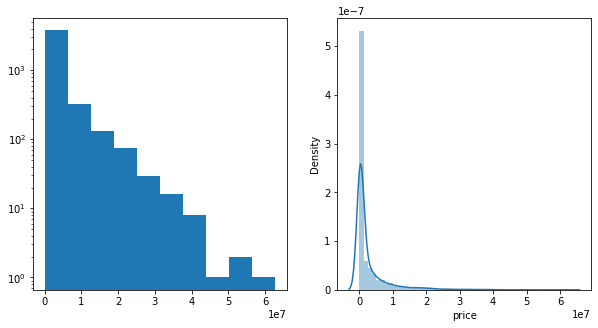

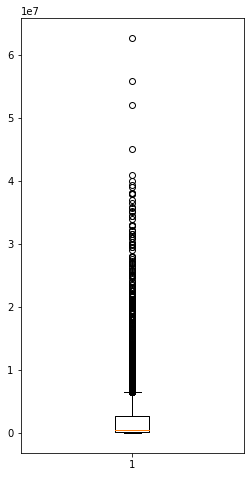

Số lượng Outlier trên IQR: 564
Số lượng Outlier dưới IQR: 0
Tỷ lệ của Outlier trong biến: 0.129


Thuộc tính "list_price":
Thống kê chung:
 count        4,370.00
mean     3,894,278.07
std      7,903,281.13
min         12,000.00
25%        279,000.00
50%        790,000.00
75%      3,590,000.00
max     82,990,000.00
Name: list_price, dtype: float64
mode = 150000.000000
median = 790000.000000
variance = 62461852679982.766
standard = 7903281.134
range = 82978000.000
Q1 = 279000.000
Q3 = 3590000.000
IQR = 3311000.000
Skew = 4.029 > 0 => Phân phối lệch phải
Kurtosis = 21.698 > 0 => Phân phối nhọn hơn phân phối chuẩn


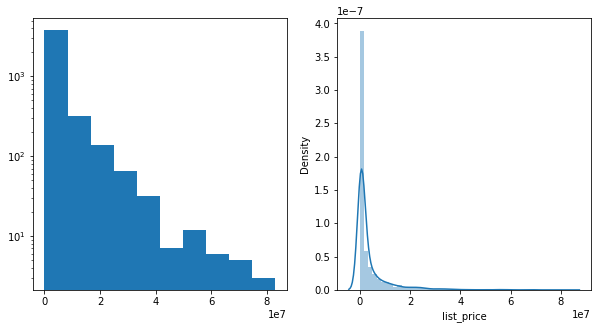

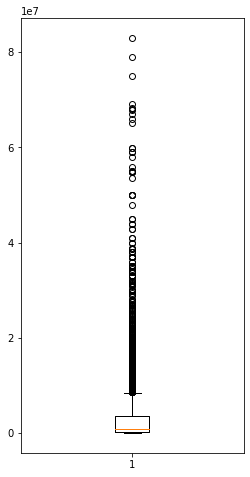

Số lượng Outlier trên IQR: 582
Số lượng Outlier dưới IQR: 0
Tỷ lệ của Outlier trong biến: 0.133




In [ ]:
# Phân phối và thống kê chung của price, list_price và rating
conti = ['price', 'list_price']
for con in conti:
  print('Thuộc tính "' + con + '":')
  PT_donbien_Continous(products, products[con])
  print('\n=========================================\n')

**Nhận xét:**
+ Rating sản phẩm có giá trị trong khoảng từ 0-5
+ Giá sản phẩm có khoảng giá trị rất rộng trong khoảng 7.0000-62.690.000 => Có sự chênh lệnh lớn về giá giữa các sản phẩm.
+ Phần lớn giá sản phẩm tập trung trong phạm vi < 3.000.000

#### 2. Brand

In [ ]:
# Xem xét sản phẩm theo thương hiệu
brands = products.groupby('brand')['item_id'].count().sort_values(ascending=False)
brands

brand
OEM          1115
Samsung       199
Panasonic      96
Sony           95
LG             95
             ... 
Klink           1
Kplus           1
LB-LINK         1
LBLink          1
\tOEM           1
Name: item_id, Length: 521, dtype: int64

+ top 1 thuộc về các sản phẩm không có thương hiệu (OEM). Vì vậy ta lấy từ top 2 trở về sau.

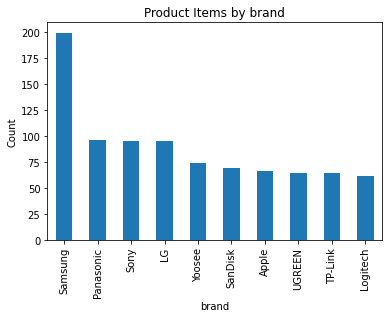

In [ ]:
# top 10 thương hiệu có nhiều sản phẩm nhất
brands[1:11].plot(kind='bar')
plt.ylabel('Count')
plt.title('Product Items by brand')
plt.show()

**Nhận xét:**
+ Thương hiệu Samsung có số lượng sản phẩm nhiều nhất. Các thương hiệu khác trong top 10 có số lương sản phẩm bán tương đương nhau.

In [ ]:
# Xem xét giá bán trung bình theo thương hiệu
price_by_brand = products.groupby('brand').mean()['price'].sort_values(ascending=False)
price_by_brand

brand
Hitachi       20,092,000.00
Surface       18,189,000.00
Bosch         17,926,200.00
Black Shark   17,290,000.00
Apple         17,122,681.82
                   ...     
I-Telecom         30,000.00
\tOEM             26,000.00
ICASE             25,000.00
Memo              24,999.00
Razer             21,200.00
Name: price, Length: 521, dtype: float64

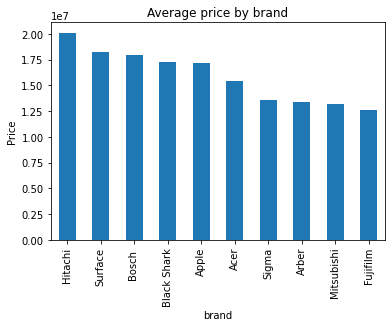

In [ ]:
# Top 10 thương hiệu có giá bán trung bình cao nhất
price_by_brand[:10].plot(kind='bar')
plt.ylabel('Price')
plt.title('Average price by brand')
plt.show()

**Nhận xét:**
+ Hitachi là thương hiệu có giá bán trung bình cho các sản phẩm là cao nhất

#### 3. Rating

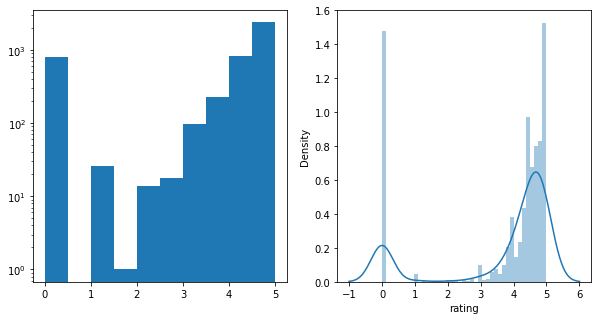

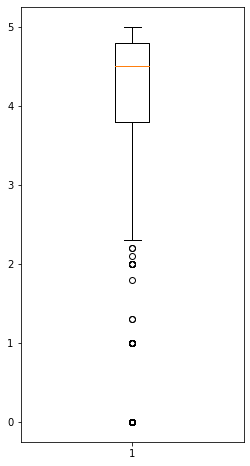

In [ ]:
# Biểu đồ phân phối của biến
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(products['rating'],log=True)
plt.subplot(1,2,2)
sns.distplot(products['rating'])
plt.show()

# Biểu đồ phân tán
plt.figure(figsize = (4,8))
plt.boxplot(products['rating'])
plt.show()

**Nhận xét:**
+ Sản phẩm có rating là 0 và 5 tương đương nhau và có số lượng khá lớn.
+ Phần lớn sản phẩm có già trị rating > 4

In [ ]:
# Nhóm và xem xét rating theo item_id của dataset product
products.groupby('rating')['item_id'].count()

rating
0.00    788
1.00     24
1.30      2
1.80      1
2.00      7
2.10      1
2.20      2
2.30      4
2.50      7
2.60      1
2.70      6
2.80      4
3.00     52
3.10      5
3.20      9
3.30     17
3.40     15
3.50     40
3.60     23
3.70     53
3.80     61
3.90     49
4.00    204
4.10     77
4.20    125
4.30    233
4.40    191
4.50    326
4.60    361
4.70    427
4.80    442
4.90    220
5.00    593
Name: item_id, dtype: int64

In [ ]:
# Xem xét rating trung bình theo product_id của khách hàng
avg_rating_customer = reviews.groupby('product_id').mean()['rating'].to_frame().reset_index()
avg_rating_customer.rename({'rating':'avg_rating'}, axis=1, inplace=True)
avg_rating_customer.head()

,product_id,avg_rating
0,54665,4.60
1,55897,4.63
2,104180,4.48
3,116897,4.24
4,122012,4.49


In [ ]:
products = products.merge(avg_rating_customer, left_on='item_id', right_on='product_id', how='left')
products.head(3)

,item_id,name,description,rating,price,list_price,brand,group,url,image,product_id,avg_rating
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.00,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...,"48,102,821.00",4.05
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.50,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...,"52,333,193.00",4.50
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.80,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...,"299,461.00",4.72


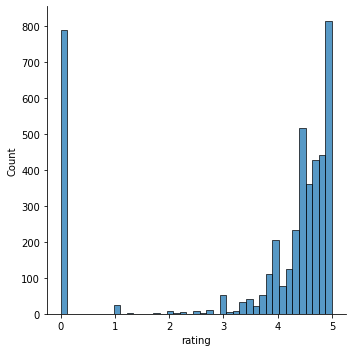

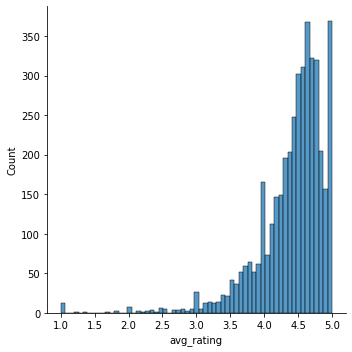

In [ ]:
sns.displot(products, x='rating', kind='hist')
sns.displot(products, x='avg_rating', kind='hist')
plt.show()

**Nhận xét:**
+ Rating của các sản phẩm trong dataset Review đa số >0. Có thể kết luận các điểm số rating=0 trong Product dataset là do thiếu dữ liệu.

## Review.csv dataset

In [ ]:
reviews.head(3)

,customer_id,product_id,name,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."


In [ ]:
reviews.shape

(361079, 6)

In [ ]:
reviews.dtypes

customer_id     int64
product_id      int64
name           object
rating          int64
title          object
content        object
dtype: object

In [ ]:
reviews.groupby("product_id").count().shape[0]

4211

In [ ]:
print(f'Có {reviews.shape[0]} đánh giá cho {reviews.groupby("product_id").count().shape[0]} sản phẩm')

Có 361079 đánh giá cho 4211 sản phẩm


#### 1. Rating

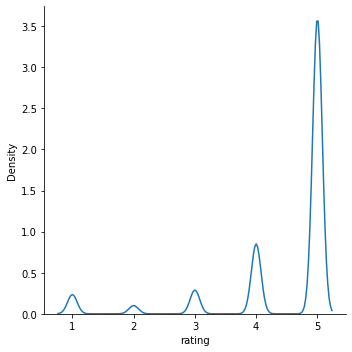

In [ ]:
# Xem xét phân phối của thuộc tính rating trong review dataset
sns.displot(reviews, x='rating', kind='kde')
plt.show()

In [ ]:
reviews['rating'].value_counts().sort_values(ascending=False)

5    256202
4     60564
3     20600
1     16615
2      7098
Name: rating, dtype: int64

**Nhận xét:**
+ Phần lớn khách hàng đánh giá sản phẩm cao. Có rating = 5


#### 2. Product

In [ ]:
# Tìm 10 sản phẩm được khách hàng đánh giá nhiều nhất (quan tâm nhất)
top_products = reviews.groupby('product_id').count()['customer_id'].sort_values(ascending=False)[:10]
top_products

product_id
299461      4715
1600005     2629
47321729    2419
405243      2316
8141868     2202
389145      2077
487511      2057
547563      2006
591960      1962
43107185    1933
Name: customer_id, dtype: int64

In [ ]:
# Lấy tên sản phẩm tương ứng với product_id
top_products.index = products[products.item_id.isin(top_products.index)]['name'].str[:25]

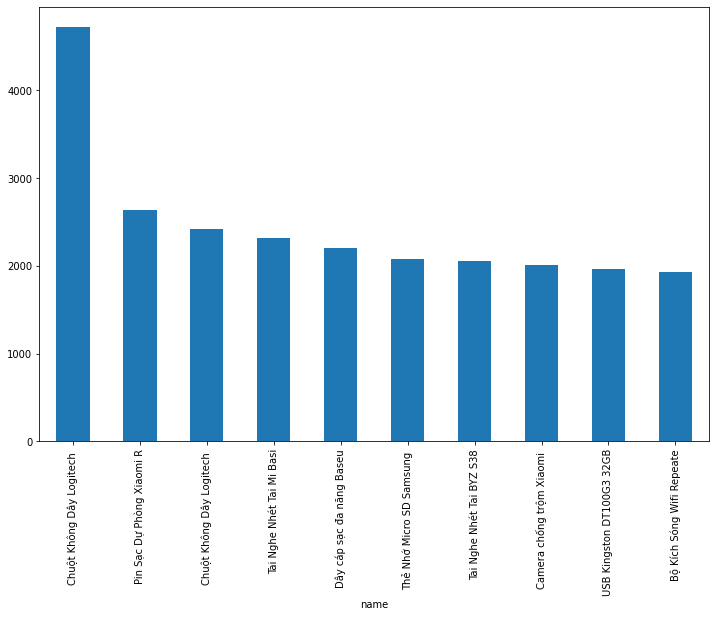

In [ ]:
plt.figure(figsize=(12,8))
top_products.plot(kind='bar')
plt.show()

**Nhận xét:**
+ Chuột không dây Logitech là sản phẩm được đánh giá nhiều nhất bởi khách hàng

#### 3. Customer

In [ ]:
# Top 10 khách hàng thực hiện đánh giá nhiều nhất
top_customers = reviews.groupby('customer_id').count()['product_id'].sort_values(ascending=False)[:10]
top_customers

customer_id
7737978    50
7280719    40
6106142    37
7377207    35
1064154    34
1425077    32
1046981    31
6177374    30
6844844    29
717732     28
Name: product_id, dtype: int64

In [ ]:
top_customers.index.to_list()

[7737978,
 7280719,
 6106142,
 7377207,
 1064154,
 1425077,
 1046981,
 6177374,
 6844844,
 717732]

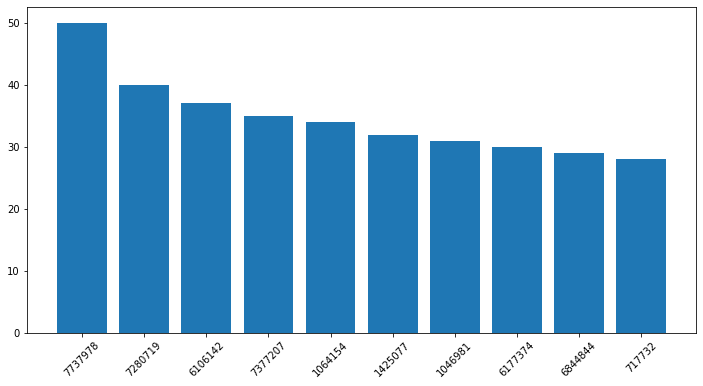

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=[str(x) for x in top_customers.index], height=top_customers.values)
plt.xticks(rotation=45)
plt.show()